**Première partie**

Grâce aux données qu'on peut extraire de tableau on obtient:
{'direct': False, 'energy': 8.0448, 'transition': 'Z-\\Gamma'}

On peut en déduire que la bande interdite est de 8.0448 eV (caractère isolant)
et que celle-ci est indirecte.



**Deuxième partie**

Pour trouver la direction qui présente le plus ou le moins de dispersion,
j'ai comparé les pentes de chaque bande de valence et de conduction dans chaque branche.
J'obtiens la pente suivante pour la plus grande dispersion dans la dernière bande de valence
0.6261499983031893 dans la direction L-P

J'obtiens la pente suivante pour la plus petite dispersion dans la dernière bande de valence
0.1001452892246405 dans la direction L-B1

J'obtiens la pente suivante pour la plus grande dispersion dans la première bande de conduction
3.9447753498844347 dans la direction Gamma - X

J'obtiens la pente suivante pour la plus petite dispersion dans la première bande de conduction
0.6165190974845267 dans la direction Q-F

Les directions sont indiquées sur la figure, cependant elles ne sont pas toutes visibles
car la dispersion minimum de la bande de conduction est hors champ


**Troisième partie**

La masse effective [kg] des sommets des dernières bandes de valance est: 
-1.0758543702038735e-29 et -7.242649151893755e-29

La masse effective [kg] des bases des premières bandes de conduction est: 
6.758387775034735e-30 et 2.8437206982999253e-28

Si l'on calcul le rapport [\] de la masse effective et de la masse d'un éléctron:
-11.810894392401728 et -79.51091395206669
7.419461823509424 et 312.18802264792237
Comme la bande interdite est très large on s'aperçoit que m*/m est bien suppérieur à 1
Ce qui correspond à un composé intermétallique.


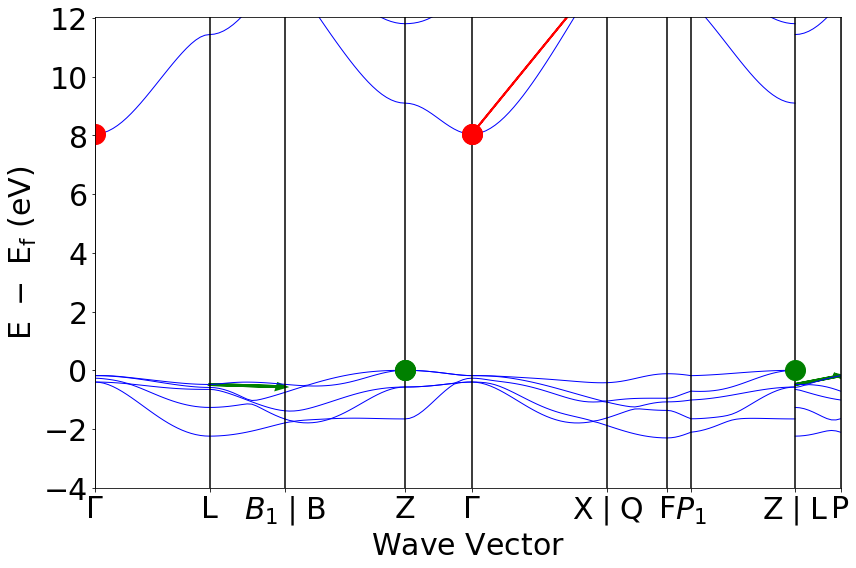

In [264]:
#Package pour créer le CIF
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

#Package pour calculer la bande éléctronique
from pymatgen.electronic_structure.plotter import BSPlotter

import matplotlib.pyplot as plt

#Package pour faire des calculs
import numpy as np

#Package pour afficher des images
from IPython.display import Image, display

#Pour écrire en gras
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string)) 

with MPRester("ZarSSb6qGcklK3b9WT") as m:

    # Pour obtenir la structure et la bande interdite du materiau
    structure = m.get_structure_by_material_id("mp-24199")
    bandstructure = m.get_bandstructure_by_material_id('mp-24199')
    
    #Extraire les valeurs de bandstructure
    bz = bandstructure.get_band_gap()
    bzE = bz.get('energy')
    pl = BSPlotter(bandstructure)
    bb = pl.bs_plot_data()
    Energie = bb.get('energy')
    Distances = bb.get('distances')
    vbm = bb.get('vbm')
    cbm = bb.get('cbm')
    
    printmd('**Première partie**')
    print("Grâce aux données qu'on peut extraire du tableau on obtient:")
    print(bz)
    print("")
    print("On peut en déduire que la bande interdite est de 8.0448 eV (caractère isolant)")
    print("et que celle-ci est indirecte.")
    print("")

    #Fonction pour trouver la valeur la plus proche dans un tableau
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]
    
    #Fonction pour retourner l'indice de la valeur la plus proche dans un tableau
    def find_index(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
    #Création du tableau rerprenant les dispersions de la bande de valence et de conduction pour chaque branche
    PenteVal = np.zeros(9)
    PenteCon = np.zeros(9)
    
    #Les abscisse pour chaque branche
    AbscissesBr0 = Distances[0]
    AbscissesBr1 = Distances[1]
    AbscissesBr2 = Distances[2]
    AbscissesBr3 = Distances[3]
    AbscissesBr4 = Distances[4]
    AbscissesBr5 = Distances[5]
    AbscissesBr6 = Distances[6]
    AbscissesBr7 = Distances[7]
    AbscissesBr8 = Distances[8]
    
    #Branche 0
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 0
    ValeurConBr0 = np.zeros(len(Energie[0].get('1')))
    for i in range(0,len(Energie[0].get('1'))):
        ValeurConBr0[i] = find_nearest(Energie[0].get('1')[i],bzE)    
    
    #Permet de trouver la bande de conduction et de valence de la branche 0
    BandeConduction0 = Energie[0].get('1')[find_index(ValeurConBr0,bzE)]
    BandeValence0 = Energie[0].get('1')[find_index(ValeurConBr0,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon0Y = (np.max(BandeConduction0) - np.min(BandeConduction0))
    penteVal0Y = (np.max(BandeValence0) - np.min(BandeValence0))
    pente0X = (np.max(AbscissesBr0) - np.min(AbscissesBr0))
    PenteCon[0] = penteCon0Y/pente0X
    PenteVal[0] = penteVal0Y/pente0X
    
    
    #Branche 1
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 1
    ValeurConBr1 = np.zeros(len(Energie[1].get('1')))
    for i in range(0,len(Energie[1].get('1'))):
        ValeurConBr1[i] = find_nearest(Energie[1].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 1
    BandeConduction1 = Energie[1].get('1')[find_index(ValeurConBr1,bzE)]
    BandeValence1 = Energie[1].get('1')[find_index(ValeurConBr1,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon1Y = (np.max(BandeConduction1) - np.min(BandeConduction1))
    penteVal1Y = (np.max(BandeValence1) - np.min(BandeValence1))
    pente1X = (np.max(AbscissesBr1) - np.min(AbscissesBr1))
    PenteCon[1] = penteCon1Y/pente1X
    PenteVal[1] = penteVal1Y/pente1X
    
     
    #Branche 2
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 2
    ValeurConBr2 = np.zeros(len(Energie[2].get('1')))
    for i in range(0,len(Energie[2].get('1'))):
        ValeurConBr2[i] = find_nearest(Energie[2].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 2
    BandeConduction2 = Energie[2].get('1')[find_index(ValeurConBr2,bzE)]
    BandeValence2 = Energie[2].get('1')[find_index(ValeurConBr2,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon2Y = (np.max(BandeConduction2) - np.min(BandeConduction2))
    penteVal2Y = (np.max(BandeValence2) - np.min(BandeValence2))
    pente2X = (np.max(AbscissesBr2) - np.min(AbscissesBr2))
    PenteCon[2] = penteCon2Y/pente2X
    PenteVal[2] = penteVal2Y/pente2X
    
    
    #Branche 3
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 3
    ValeurConBr3 = np.zeros(len(Energie[3].get('1')))
    for i in range(0,len(Energie[3].get('1'))):
        ValeurConBr3[i] = find_nearest(Energie[3].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 3
    BandeConduction3 = Energie[3].get('1')[find_index(ValeurConBr3,bzE)]
    BandeValence3 = Energie[3].get('1')[find_index(ValeurConBr3,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon3Y = (np.max(BandeConduction3) - np.min(BandeConduction3))
    penteVal3Y = (np.max(BandeValence3) - np.min(BandeValence3))
    pente3X = (np.max(AbscissesBr3) - np.min(AbscissesBr3))
    PenteCon[3] = penteCon3Y/pente3X
    PenteVal[3] = penteVal3Y/pente3X
    
    
    #Branche 4
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 4
    ValeurConBr4 = np.zeros(len(Energie[4].get('1')))
    for i in range(0,len(Energie[4].get('1'))):
        ValeurConBr4[i] = find_nearest(Energie[4].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 4
    BandeConduction4 = Energie[4].get('1')[find_index(ValeurConBr4,bzE)]
    BandeValence4 = Energie[4].get('1')[find_index(ValeurConBr4,0)+1]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon4Y = (np.max(BandeConduction4) - np.min(BandeConduction4))
    penteVal4Y = (np.max(BandeValence4) - np.min(BandeValence4))
    pente4X = (np.max(AbscissesBr4) - np.min(AbscissesBr4))
    PenteCon[4] = penteCon4Y/pente4X
    PenteVal[4] = penteVal4Y/pente4X
    
    
    #Branche 5
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 5
    ValeurConBr5 = np.zeros(len(Energie[5].get('1')))
    for i in range(0,len(Energie[5].get('1'))):
        ValeurConBr5[i] = find_nearest(Energie[5].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 5
    BandeConduction5 = Energie[5].get('1')[find_index(ValeurConBr5,bzE)]
    BandeValence5 = Energie[5].get('1')[find_index(ValeurConBr5,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon5Y = (np.max(BandeConduction5) - np.min(BandeConduction5))
    penteVal5Y = (np.max(BandeValence5) - np.min(BandeValence5))
    pente5X = (np.max(AbscissesBr5) - np.min(AbscissesBr5))
    PenteCon[5] = penteCon5Y/pente5X
    PenteVal[5] = penteVal5Y/pente5X
    
    
    #Branche 6
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 6
    ValeurConBr6 = np.zeros(len(Energie[6].get('1')))
    for i in range(0,len(Energie[6].get('1'))):
        ValeurConBr6[i] = find_nearest(Energie[6].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 6
    BandeConduction6 = Energie[6].get('1')[find_index(ValeurConBr6,bzE)]
    BandeValence6 = Energie[6].get('1')[find_index(ValeurConBr6,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon6Y = (np.max(BandeConduction6) - np.min(BandeConduction6))
    penteVal6Y = (np.max(BandeValence6) - np.min(BandeValence6))
    pente6X = (np.max(AbscissesBr6) - np.min(AbscissesBr6))
    PenteCon[6] = penteCon6Y/pente6X
    PenteVal[6] = penteVal6Y/pente6X
    
    
    #Branche 7
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 7
    ValeurConBr7 = np.zeros(len(Energie[7].get('1')))
    for i in range(0,len(Energie[7].get('1'))):
        ValeurConBr7[i] = find_nearest(Energie[7].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 7
    BandeConduction7 = Energie[7].get('1')[find_index(ValeurConBr7,bzE)]
    BandeValence7 = Energie[7].get('1')[find_index(ValeurConBr7,0)+1]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon7Y = (np.max(BandeConduction7) - np.min(BandeConduction7))
    penteVal7Y = (np.max(BandeValence7) - np.min(BandeValence7))
    pente7X = (np.max(AbscissesBr7) - np.min(AbscissesBr7))
    PenteCon[7] = penteCon7Y/pente7X
    PenteVal[7] = penteVal7Y/pente7X
    
    
    #Branche 8
    #Creer un tableau qui reprend la valeur la plus proche de 8.0448 de chaque bande dans la brache 8
    ValeurConBr8 = np.zeros(len(Energie[8].get('1')))
    for i in range(0,len(Energie[8].get('1'))):
        ValeurConBr8[i] = find_nearest(Energie[8].get('1')[i],bzE)   
    
    #Permet de trouver la bande de conduction et de valence de la branche 8
    BandeConduction8 = Energie[8].get('1')[find_index(ValeurConBr8,bzE)]
    BandeValence8 = Energie[8].get('1')[find_index(ValeurConBr8,0)]
    
    #Calcul de la dispersion en soustrayant la valeur maximal et minimal de l'energie
    penteCon8Y = (np.max(BandeConduction8) - np.min(BandeConduction8))
    penteVal8Y = (np.max(BandeValence8) - np.min(BandeValence8))
    pente8X = (np.max(AbscissesBr8) - np.min(AbscissesBr8))
    PenteCon[8] = penteCon8Y/pente8X
    PenteVal[8] = penteVal8Y/pente8X
    
    #Comparer les pentes pour trouver la plus grande dispersion
    PenteMaxCon = np.max(PenteCon)
    PenteMinCon = np.min(PenteCon)
    PenteMaxVal = np.max(PenteVal)
    PenteMinVal = np.min(PenteVal)
    
    printmd('**Deuxième partie**')
    print("Pour trouver la direction qui présente le plus ou le moins de dispersion,")
    print("j'ai comparé les pentes de chaque bande de valence et de conduction dans chaque branche.")
    print("J'obtiens la pente suivante pour la plus grande dispersion dans la dernière bande de valence")
    print(PenteMaxVal, "dans la direction L-P")
    print("")
    print("J'obtiens la pente suivante pour la plus petite dispersion dans la dernière bande de valence")
    print(PenteMinVal, "dans la direction L-B1")
    print("")
    print("J'obtiens la pente suivante pour la plus grande dispersion dans la première bande de conduction")
    print(PenteMaxCon, "dans la direction Gamma - X")
    print("")
    print("J'obtiens la pente suivante pour la plus petite dispersion dans la première bande de conduction")
    print(PenteMinCon, "dans la direction Q-F")
    print("")
    print("Les directions sont indiquées sur la figure, cependant elles ne sont pas toutes visibles")
    print("car la dispersion minimum de la bande de conduction est hors champ")
    
    #Calcul de la masse
    Masse1Y = np.append(BandeValence2,BandeValence3)
    Masse1X = np.append(AbscissesBr2,AbscissesBr3)
    
    Masse4Y = np.append(BandeValence3,BandeValence4)
    Masse4X = np.append(AbscissesBr3,AbscissesBr4)
    
    #interpolation du seconde ordre (parabolique)
    a1,b1,c1 = np.polyfit(Masse1X,Masse1Y,2)
    a2,b2,c2 = np.polyfit(AbscissesBr7,BandeValence7,2)
    a3,b3,c3 = np.polyfit(AbscissesBr0,BandeConduction0,2)
    a4,b4,c4 = np.polyfit(Masse4X,Masse4Y,2)
    hbar = 1.0546*10**(-34)
    
    m1v = hbar**2/(2*a1*10**(-20)*(1.602*10**(-19)))
    m2v = hbar**2/(2*a2*10**(-20)*(1.602*10**(-19)))
    m3c = hbar**2/(2*a3*10**(-20)*(1.602*10**(-19)))
    m4c = hbar**2/(2*a4*10**(-20)*(1.602*10**(-19)))
    
    printmd('**Troisième partie**')
    print("La masse effective [kg] des sommets des dernières bandes de valance est: ")
    print(m1v, "et", m2v)
    print("")
    print("La masse effective [kg] des bases des premières bandes de conduction est: ")
    print(m3c, "et", m4c)
    print("")
    print("Si l'on calcul le rapport [\] de la masse effective et de la masse d'un éléctron:")   
    print(m1v/(9.109*10**(-31)), "et", m2v/(9.109*10**(-31)))
    print(m3c/(9.109*10**(-31)), "et", m4c/(9.109*10**(-31)))
    print("Comme la bande interdite est très large on s'aperçoit que m*/m est bien suppérieur à 1")
    print("Ce qui correspond à un composé intermétallique.")
    
    pl.get_plot()
    plt.plot(vbm[0][0],vbm[0][1], 'go',markersize=20)
    plt.plot(vbm[1][0],vbm[1][1], 'go',markersize=20)
    plt.plot(vbm[2][0],vbm[2][1], 'go',markersize=20)
    plt.plot(cbm[0][0],cbm[0][1], 'ro',markersize=20)
    plt.plot(cbm[1][0],cbm[1][1], 'ro',markersize=20)
    plt.plot(cbm[2][0],cbm[2][1], 'ro',markersize=20)
    plt.arrow(AbscissesBr4[0],BandeConduction4[0],pente4X,penteCon4Y, head_width=0.08, head_length=0.05, linewidth=2, color='r', length_includes_head=True)
    plt.arrow(AbscissesBr5[0],BandeConduction5[0],pente5X,penteCon5Y, head_width=0.05, head_length=0.03, linewidth=2, color='r', length_includes_head=True)
    plt.arrow(AbscissesBr1[0],BandeValence1[0],pente1X,-penteVal1Y, head_width=0.18, head_length=0.08, linewidth=3, color='g', length_includes_head=True)
    plt.arrow(AbscissesBr8[0],np.min(BandeValence8),pente8X,penteVal8Y, head_width=0.18, head_length=0.03, linewidth=3, color='g', length_includes_head=True)